# **GOOGLE STOCK PREDICTION USING NEURAL NETWORK** 

---
* LSTM (Long Short Term Memory)
* BiLSTM (Bidirectional Long Short Term Memory)

In this project we are going to investigate close price of the stock over time.

Thus, We attempt to predict future stock behavior
(Predicting the stock closing price of GOOGLE dataset)

# GOOGLE dataset 

## reading dataset

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
root='/gdrive/MyDrive/'

Mounted at /gdrive


**importing libraries**

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM,SimpleRNN,Dropout
from keras.callbacks import History
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM

import time #helper libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from numpy import newaxis

import time

# For time stamps
from datetime import datetime


In [ ]:
pd.set_option('display.max_columns',None)  #to show all columns
data= pd.read_csv(root+'Google_Stock_Price_Train.csv', parse_dates=True, index_col='Date', squeeze=True) #reading dataset
data_test=pd.read_csv(root+'Google_Stock_Price_Test.csv', parse_dates=True, index_col='Date', squeeze=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


In [ ]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
cols=['Close','Volume']

for c in cols:
  #convert strings to numbers in dataset
  data[c] = data[c].str.replace(',','').astype(float) 

In [ ]:
n2Row, n2Col = data.shape
print(f'There are {n2Row} rows and {n2Col} columns in Google_Stock_Price_Train dataset')
n3Row, n3Col = data_test.shape
print(f'There are {n3Row} rows and {n3Col} columns in Google_Stock_Price_Test dataset')

There are 1258 rows and 5 columns in Google_Stock_Price_Train dataset
There are 20 rows and 5 columns in Google_Stock_Price_Test dataset


In [ ]:
data.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,7380500.0
2012-01-04,331.27,333.87,329.08,666.45,5749400.0
2012-01-05,329.83,330.75,326.89,657.21,6590300.0
2012-01-06,328.34,328.77,323.68,648.24,5405900.0
2012-01-09,322.04,322.29,309.46,620.76,11688800.0


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [ ]:
#convert strings to numbers in dataset
data_test['Volume'] = data_test['Volume'].str.replace(',','').astype(float) 

In [ ]:
data_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,1657300.0
2017-01-04,788.36,791.34,783.16,786.90,1073000.0
2017-01-05,786.08,794.48,785.02,794.02,1335200.0
2017-01-06,795.26,807.90,792.20,806.15,1640200.0
2017-01-09,806.40,809.97,802.83,806.65,1272400.0


With regard to datasets, we have to convert strings to numbers in order to make data ready for use in calculations:

In [ ]:
GOOGLE=data.copy()
GOOGLE_test = data_test.copy()

In [ ]:
GOOGLE_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,1657300.0
2017-01-04,788.36,791.34,783.16,786.90,1073000.0
2017-01-05,786.08,794.48,785.02,794.02,1335200.0
2017-01-06,795.26,807.90,792.20,806.15,1640200.0
2017-01-09,806.40,809.97,802.83,806.65,1272400.0


# visualizing stock prices history

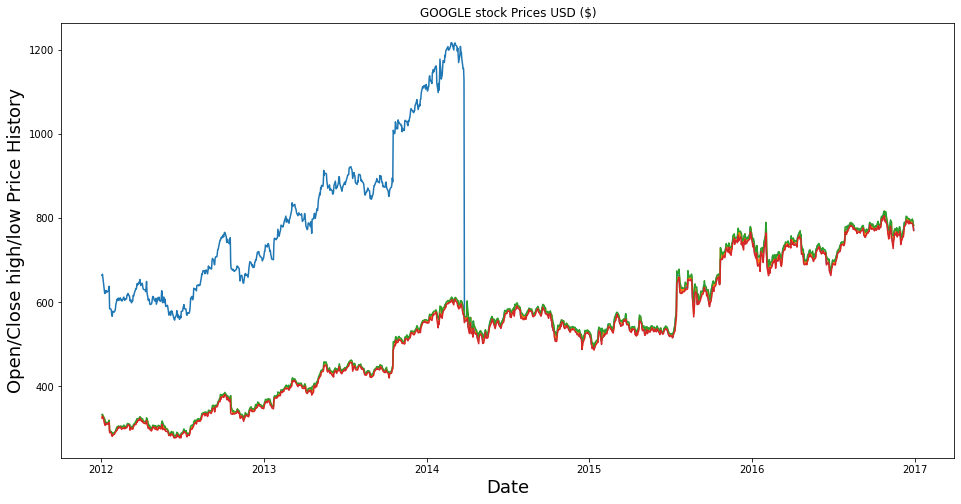

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(16,8))
plt.title('GOOGLE stock Prices USD ($)')
plt.plot(GOOGLE[['Close','Open', 'High', 'Low']])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open/Close high/low Price History', fontsize=18)
plt.show()
plt.tight_layout()

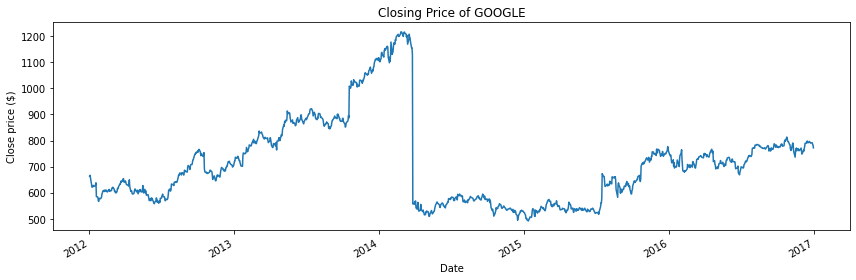

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplots_adjust(top=1.25, bottom=1.2)

GOOGLE['Close'].plot()
plt.ylabel('Close price ($)')
plt.xlabel('Date')
plt.title(f"Closing Price of GOOGLE")
    
plt.tight_layout()

## The total volume of stock which traded each day

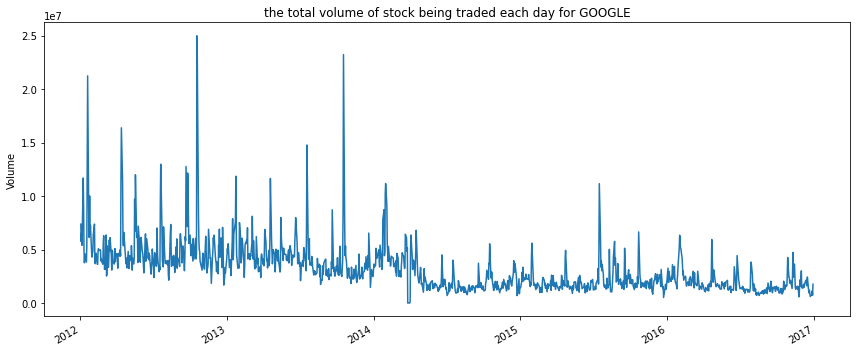

In [ ]:
plt.figure(figsize=(12, 5))

GOOGLE['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"the total volume of stock being traded each day for GOOGLE")
    
plt.tight_layout()

# Moving averages

In [ ]:
ma_day = [10, 20, 50] #the most common moving averages

for ma in ma_day:
    column_name = f"MA for {ma} days"
    GOOGLE[column_name] = GOOGLE['Open'].rolling(ma).mean()

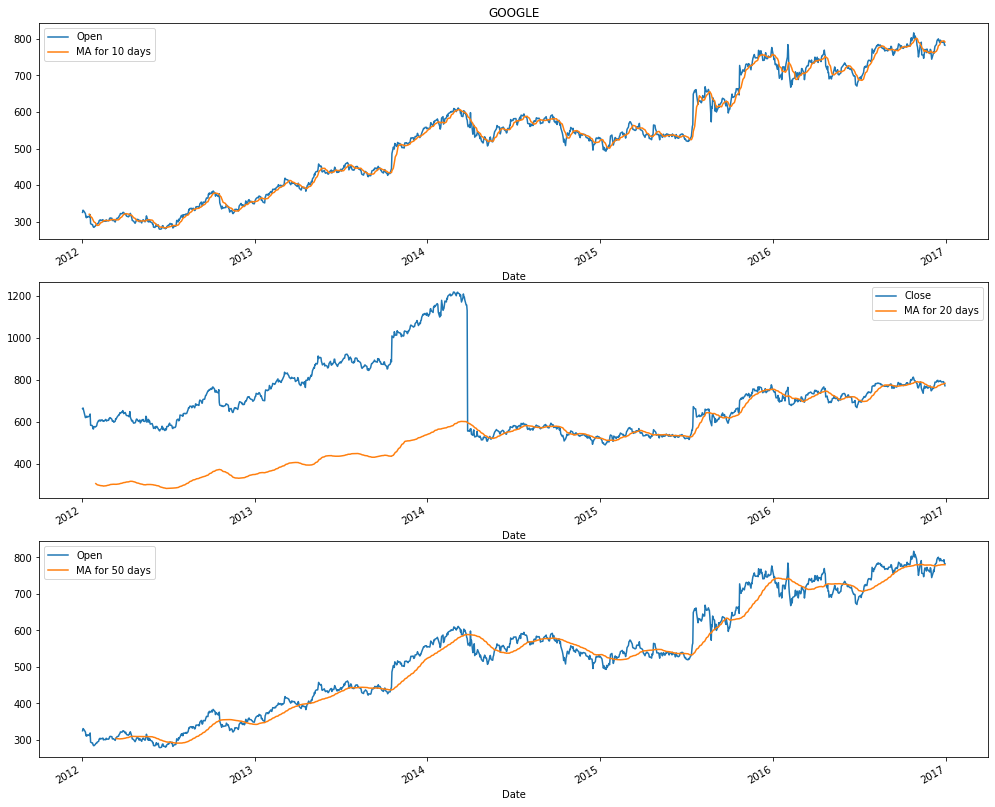

<Figure size 1224x360 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_figheight(15)
fig.set_figwidth(17)

plt.figure(figsize=(17, 5))

plt.subplots_adjust(top=1.25, bottom=1.2)

GOOGLE[['Open', 'MA for 10 days']].plot(ax=axes[0])
axes[0].set_title('GOOGLE')
GOOGLE[['Close','MA for 20 days']].plot(ax=axes[1])
GOOGLE[['Open','MA for 50 days']].plot(ax=axes[2])



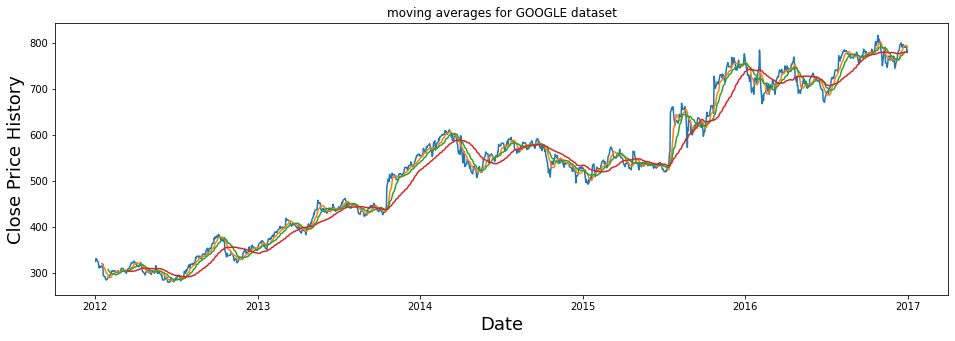

In [ ]:
fig.set_figheight(5)
fig.set_figwidth(18)
plt.figure(figsize=(16,5))
plt.title('moving averages for GOOGLE dataset')
plt.plot(GOOGLE[['Open', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price History', fontsize=18)
plt.show()
fig.tight_layout()

##The percent change for each day

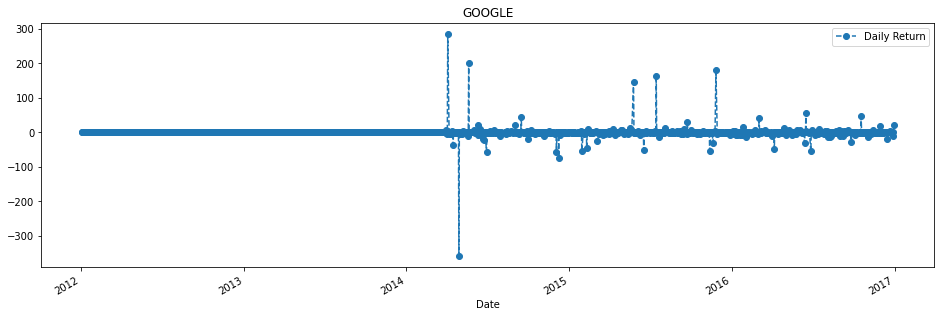

In [ ]:
company_list=[GOOGLE]
for company in company_list:
    company['Daily Return'] = (company['Close']-company['Open']).pct_change() # using pct_change to find the percent change for each day

# plotting the daily return percentage

fig.set_figheight(7)
fig.set_figwidth(18)
plt.figure(figsize=(16,5))

GOOGLE['Daily Return'].plot( legend=True, linestyle='--', marker='o')
plt.title('GOOGLE')

fig.tight_layout()

# FITTING GOOGLE DATASET TO MODEL

* To build a LSTM model,we need to seperate our stock data into a training set and a test set.
* A special data structure is needed to cover 60-time stamps, based on which RNN will predict the 61st price. Here the number of past timestamps is set to 60 based on experimentation. Thus, x_train is a nested list, which contains lists of 60 time-stamp prices

* Normalization is a very important part for any Recurrent Neural Network. For our LSTM model, normalization will play an important role. Normalization using MinMaxScaler will bring our entire datapoints between a minimum and a maximum value. For this purpose, we will use the values (0,1).
* now we choose a specific stock feature: Close ,normalize stock data ,then create train, validation and test data sets

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

# preparing training set:

extract close values from stock data and convert it to a number series and calculate the size for 90% of dataset.(math ceil used to ensure the size is integer):

In [ ]:
close_prices= data.filter(['Close']) #creates a dataframe just with specified column( close )
values = close_prices.values
training_data_len = math.ceil(len(values) * 0.9)

normalizing data and set apart 90% of data as the training set:

In [ ]:
scaled_data=scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len,:]

we set a window_size = 60 .then create a 60-day window of historical values(i- 60) as our feature data (x_train), and the following 60-day window as label data (y_train).

In [ ]:
window_size = 60
x_train=[]
y_train=[]
for i in range(window_size,len(train_data)):
  x_train.append(train_data[i-window_size:i,0])
  y_train.append(train_data[i,0])

In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)

Reshape data:
* we only have one indicator or feature (Close price). But we can add more indicators following the same data processing methods.
* newshape is in (batch size, number of timestamps, number of indicators). (batch size, number of timestamps) is the shape of x_train. Here we only have 1 indicator.

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

# preparing test set:
extract 'Close' values from normalized dataset(the last 10% of dataset).
similar to training set, we will have to create feature data(x_test) and label data (y_test) from our test set:

In [ ]:
test_data = scaled_data[training_data_len - window_size: , :]
x_test=[]
y_test= values[training_data_len:]
for j in range(window_size,len(test_data)):
  x_test.append(test_data[j-window_size:j,0])

x_test=np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (1073, 60, 1)
y_train.shape =  (1073,)
x_test.shape =  (125, 60, 1)
y_test.shape =  (125, 1)


## LSTM MODEL NO.1

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(64 , return_sequences=True,activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(1,activation='linear'))
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            42240     
                                                                 
 dropout_1 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 95,489
Trainable params: 95,489
Non-traina

1. we defined a sequential model which consists of a linear stack of layers.
2. adding each dropout layer to prevent overfitting. when defining drop out layers we specify 0.2,meaning that 20% of the layers will be dropped.
3. add a LSTM layer by 100 network units.setting return_sequence = true means the output of the layer will be another sequence of the same lenght.
4.  return_sequences is True as we need to add another LSTM layer after the current one. 
5. add another LSTM layer with 100 units and return_sequence = false means that this time just the last output returns in the output unit.so, the last LSTM layer, return_sequences is False as we will not add more LSTM layers.
6. adding a densly connected layer that specifies the output of 1 network unit.The output dimension is 1 since we are predicting 1 price each time.

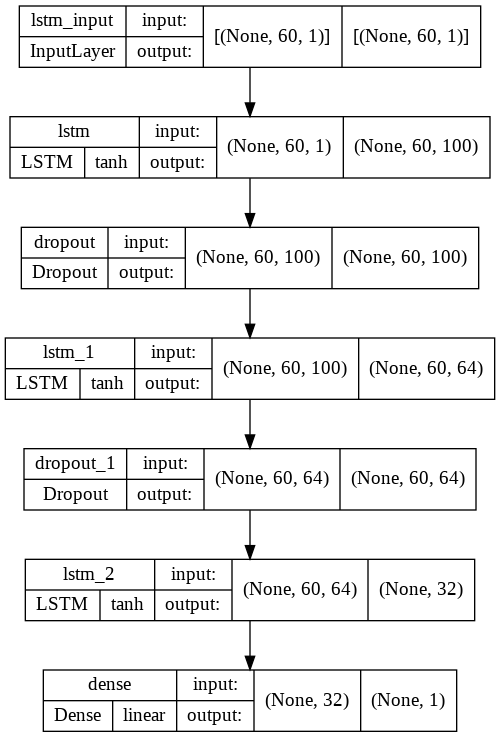

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True,
                          show_dtype=False, show_layer_names=True,rankdir='TB',
                          expand_nested=False, dpi=96, layer_range=None,
                          show_layer_activations=True)

# Training the model
We now train our model with the training data over 50 epochs and with a batch size = 32 and we set the optimizer to be Adam and the mean squared error to be loss function:

In [ ]:
# Train the model
history = model.fit(x_train, y_train,epochs=50, batch_size=32 , validation_split=0.25,  verbose=1 , shuffle=True)

Epoch 1/50
26/26 [==============================] - 15s 285ms/step - loss: 0.0271 - accuracy: 0.0025 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 2/50
26/26 [==============================] - 8s 322ms/step - loss: 0.0089 - accuracy: 0.0025 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 3/50
26/26 [==============================] - 6s 238ms/step - loss: 0.0067 - accuracy: 0.0025 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 4/50
26/26 [==============================] - 6s 239ms/step - loss: 0.0056 - accuracy: 0.0025 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 5/50
26/26 [==============================] - 6s 239ms/step - loss: 0.0053 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 6/50
26/26 [==============================] - 6s 238ms/step - loss: 0.0075 - accuracy: 0.0025 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 7/50
26/26 [==============================] - 6s 238ms/step - loss: 0.0046 - accuracy: 0.0025 - val_loss: 0.0016 - va

# Model evaluation
we evaluate our model with test set and then apply mean squared error (MSE) and root mean squared error(RMSE) and r_squared metrics to examine the performance of the model.

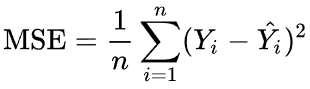

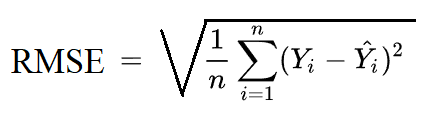

MSE is beneficial when the spread of prediction values is significant and larger values must be punished.

When the spread is important and bigger values need to be penalized, RMSE (NRMSE) is also useful. When compared to MSE, RMSE is easier to interpret because the RMSE number is on the same scale as the projected values.

# R-Squared 
The stationary R-squared is used in time series forecasting as a measure that compares the stationary part of the model to a simple mean model. ​​It is defined as, 

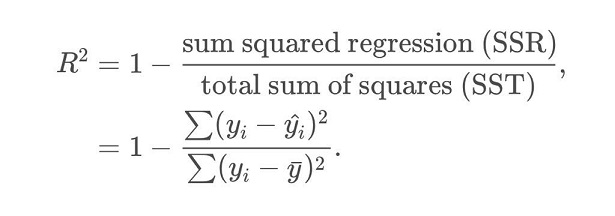


When the relation between the forecasted and actual value is to be known then R2 is used. 

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
mse = np.mean(predictions - y_test)**2
from sklearn.metrics import r2_score
R2 = r2_score(y_test, predictions, multioutput='variance_weighted')
print('RMSE : ',rmse)
print('MSE : ',mse)
print('R2 : ',R2)

RMSE :  3.729775312500001
MSE :  13.91122388173448
R2 :  0.7389681205217664


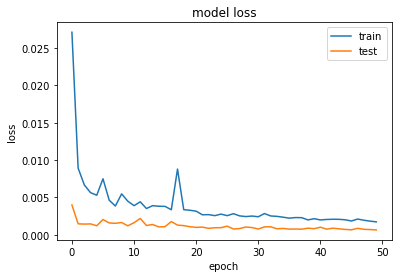

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


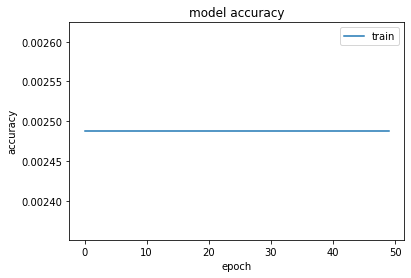

In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense

# list all data in history
print(history.history.keys())

# summarize history for accuracy

plt.size=(10,5)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
print('accuracy =',history.history['accuracy'][-1])

accuracy = 0.002487562131136656


# Visualizing predicted closing prices

In [ ]:
training_data_len

1133

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


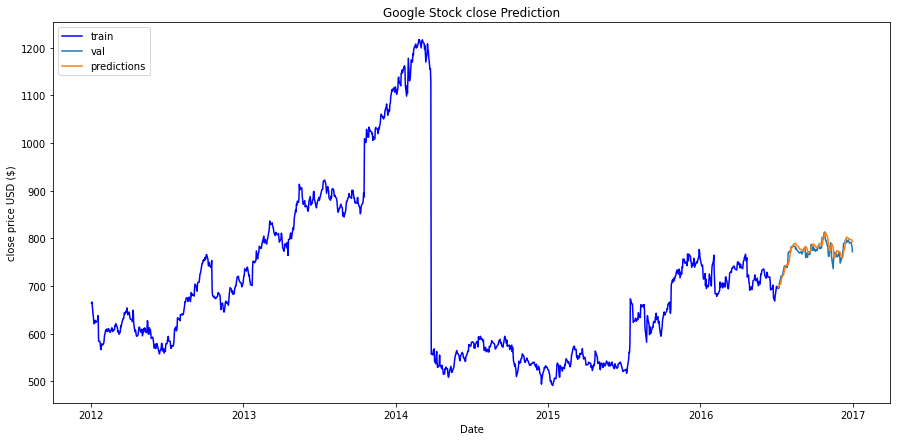

In [ ]:
# Predict the stock closing price

data1 = data.filter(['Close'])
train= data1[:training_data_len]
validation = data1[training_data_len:]
validation['predictions'] = predictions

plt.figure(figsize=(15, 7))
plt.title('Google Stock close Prediction')
plt.xlabel('Date')
plt.ylabel('close price USD ($)')
plt.plot(train, color='blue')
plt.plot(validation[['Close','predictions']])
plt.legend(['train','val','predictions'],loc='upper left')
plt.show()

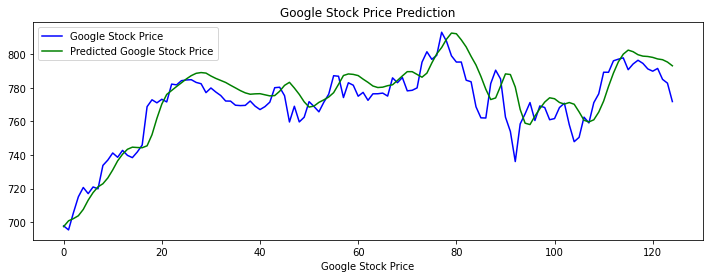

In [ ]:
# Predict the stock prices

plt.figure(figsize=(12, 4))

real_stock_price = y_test[:]
plt.plot(real_stock_price, color='blue', label='Google Stock Price')
plt.plot(predictions, color='green', label='Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.xlabel('Google Stock Price')
plt.legend()
plt.show()

## LSTM MODEL NO.2

In [ ]:
# Building Model:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.LSTM(units=50))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 50)               

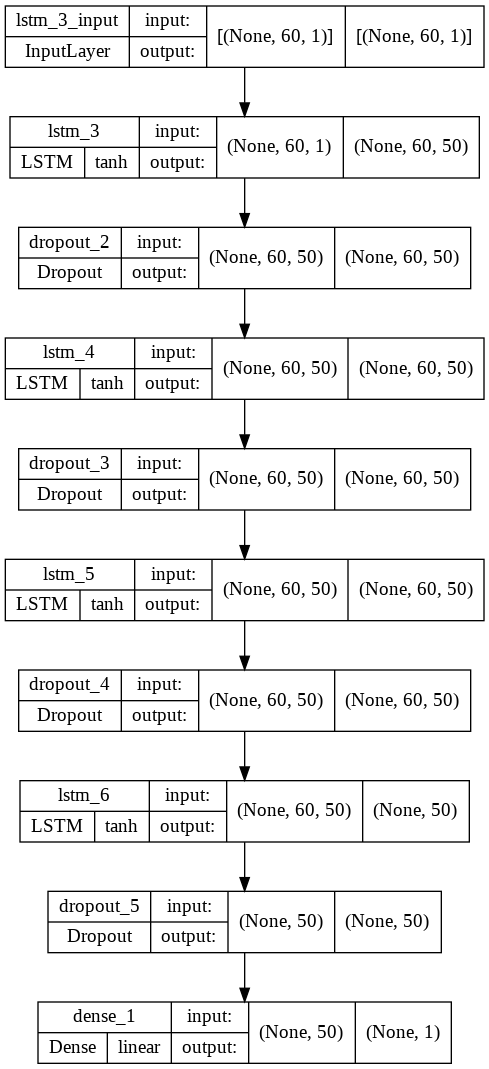

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True,
                          show_dtype=False, show_layer_names=True,rankdir='TB',
                          expand_nested=False, dpi=96, layer_range=None,
                          show_layer_activations=True)

In [ ]:
start = time.time()
model.compile(loss='mse',  optimizer='adam', metrics=['accuracy'])
print ('compilation time : ', time.time() - start)

compilation time :  0.01719069480895996


Keras's fit() does not return the model but it returns a History object that contain per-epoch loss and metrics.

In [ ]:
history =model.fit(x_train, y_train, epochs=100,batch_size=32,validation_split=0.25, verbose=1 , shuffle=True)

Epoch 1/100
26/26 [==============================] - 12s 192ms/step - loss: 0.0481 - accuracy: 0.0025 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 2/100
26/26 [==============================] - 3s 132ms/step - loss: 0.0223 - accuracy: 0.0025 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 3/100
26/26 [==============================] - 3s 132ms/step - loss: 0.0184 - accuracy: 0.0025 - val_loss: 0.0056 - val_accuracy: 0.0000e+00
Epoch 4/100
26/26 [==============================] - 3s 131ms/step - loss: 0.0191 - accuracy: 0.0012 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 5/100
26/26 [==============================] - 3s 133ms/step - loss: 0.0165 - accuracy: 0.0025 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 6/100
26/26 [==============================] - 3s 132ms/step - loss: 0.0163 - accuracy: 0.0025 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 7/100
26/26 [==============================] - 3s 133ms/step - loss: 0.0154 - accuracy: 0.0025 - val_loss: 0.00

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
mse = np.mean(predictions - y_test)**2
from sklearn.metrics import r2_score
R2 = r2_score(y_test, predictions, multioutput='variance_weighted')
print('RMSE : ',rmse)
print('MSE : ',mse)
print('R2 : ',R2)

RMSE :  6.235203535156251
MSE :  38.87776312482501
R2 :  0.6655010188246948


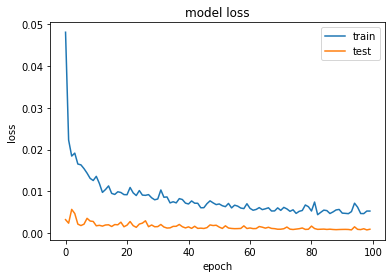

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


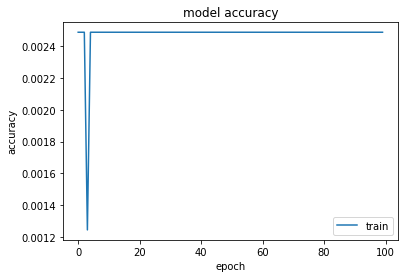

In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense

# list all data in history
print(history.history.keys())

# summarize history for accuracy

plt.size=(10,5)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
print('accuracy =',history.history['accuracy'][-1])

accuracy = 0.002487562131136656


# Visualizing predicted close prices

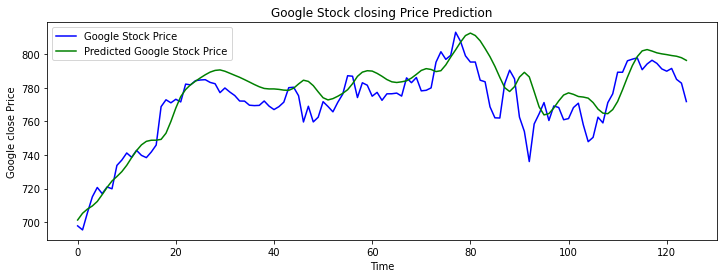

In [ ]:
# Predict the stock prices

plt.figure(figsize=(12, 4))

real_stock_price = y_test[:]
plt.plot(real_stock_price, color='blue', label='Google Stock Price')
plt.plot(predictions, color='green', label='Predicted Google Stock Price')

plt.title('Google Stock closing Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google close Price')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


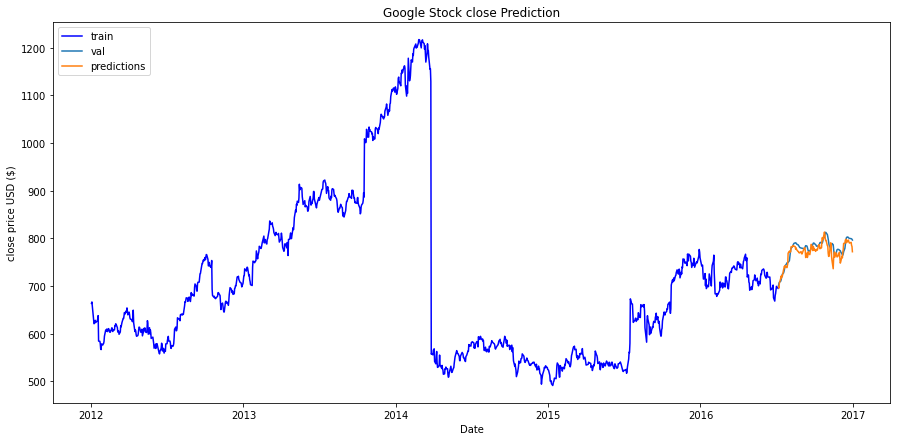

In [ ]:
# Predict the stock closing price

data1 = data.filter(['Close'])
train= data1[:training_data_len]
validation = data1[training_data_len:]
validation['predictions'] = predictions

plt.figure(figsize=(15, 7))
plt.title('Google Stock close Prediction')
plt.xlabel('Date')
plt.ylabel('close price USD ($)')
plt.plot(train, color='blue')
plt.plot(validation[['predictions','Close']])
plt.legend(['train','val','predictions'],loc='upper left')
plt.show()

## BI-LSTM MODEL

Build the bidirectional lstm model

In [ ]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='tanh'), input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.build((x_train.shape[1],1)) 
model.add(Dense(1))

In [ ]:
start = time.time()
model.compile(loss='mse',  optimizer='adam', metrics=['accuracy'])
print ('compilation time : ', time.time() - start)

compilation time :  0.00795745849609375


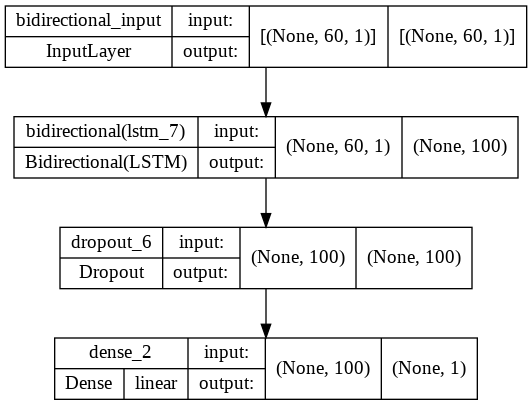

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True,
                          show_dtype=False, show_layer_names=True,rankdir='TB',
                          expand_nested=False, dpi=96, layer_range=None,
                          show_layer_activations=True)

In [ ]:
history=model.fit(x_train, y_train, epochs=50, batch_size=32,validation_split=0.2,  verbose=1 , shuffle=True)

Epoch 1/50
27/27 [==============================] - 8s 130ms/step - loss: 0.0298 - accuracy: 0.0023 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 2/50
27/27 [==============================] - 3s 110ms/step - loss: 0.0103 - accuracy: 0.0023 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 3/50
27/27 [==============================] - 3s 111ms/step - loss: 0.0078 - accuracy: 0.0023 - val_loss: 8.8391e-04 - val_accuracy: 0.0000e+00
Epoch 4/50
27/27 [==============================] - 3s 111ms/step - loss: 0.0051 - accuracy: 0.0023 - val_loss: 8.4585e-04 - val_accuracy: 0.0000e+00
Epoch 5/50
27/27 [==============================] - 3s 111ms/step - loss: 0.0046 - accuracy: 0.0023 - val_loss: 5.6746e-04 - val_accuracy: 0.0000e+00
Epoch 6/50
27/27 [==============================] - 3s 111ms/step - loss: 0.0048 - accuracy: 0.0023 - val_loss: 9.8704e-04 - val_accuracy: 0.0000e+00
Epoch 7/50
27/27 [==============================] - 3s 111ms/step - loss: 0.0038 - accuracy: 0.0023 - val_lo

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
mse = np.mean(predictions - y_test)**2
from sklearn.metrics import r2_score
R2 = r2_score(y_test, predictions, multioutput='variance_weighted')
print('RMSE : ',rmse)
print('MSE : ',mse)
print('R2 : ',R2)

RMSE :  11.538846113281252
MSE :  133.14496962598585
R2 :  0.5392159314681311


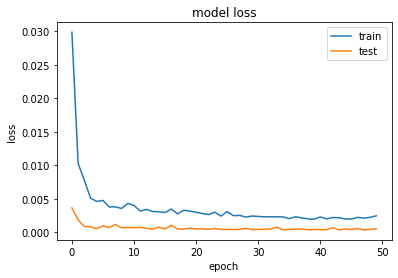

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


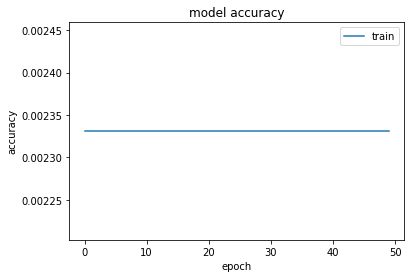

In [ ]:
# Visualize training history
# list all data in history
print(history.history.keys())

# summarize history for accuracy

plt.size=(10,5)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
print('accuracy =',history.history['accuracy'][-1])

accuracy = 0.0023310023825615644


# Visualizing predicted closing prices

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


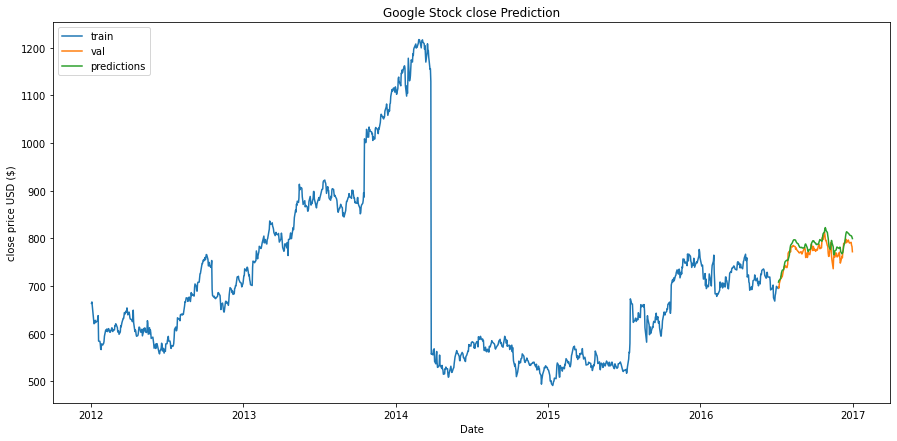

In [ ]:
# Predict the stock closing price

data1 = data.filter(['Close'])
train= data1[:training_data_len]
validation = data1[training_data_len:]
validation['predictions'] = predictions

plt.figure(figsize=(15, 7))
plt.title('Google Stock close Prediction')
plt.xlabel('Date')
plt.ylabel('close price USD ($)')
plt.plot(train)
plt.plot(validation[['Close','predictions']])
plt.legend(['train','val','predictions'],loc='upper left')
plt.show()

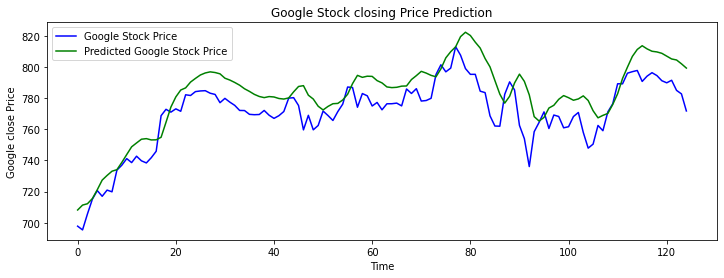

In [ ]:
# Predict the stock prices

plt.figure(figsize=(12, 4))

real_stock_price = y_test[:]
plt.plot(real_stock_price, color='blue', label='Google Stock Price')
plt.plot(predictions, color='green', label='Predicted Google Stock Price')

plt.title('Google Stock closing Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google close Price')
plt.legend()
plt.show()